<a href="https://colab.research.google.com/github/dellavecchiaemiliano/Thesis_Project/blob/main/Dataset_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounting Drive**


This allows me to import dataset from my Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

#**Importing dataset**

Firstly, I imported the whole Dataset I received from Gruppo BCC ICCREA.

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/TESI NPL's/Dati_NPL's.xlsx", header=1)
df

,Pratica,TitolareCredito,NDG,TIPO IPOTECA:\n- Volontaria\n- Giudiziale\n,IMPORTO IPOTECA,GRADO IPOTECA FORMALE (contrattuale),Regione debitore,Provincia debitore,CAP,Comune debitore,...,NBV_Ingresso,Rapporti_Ripetuti,Singolo_Rapporto,Rapporto,Incassi,IncassoDevCessione,IncassoxRapporto,Perdita,PerditaxRapporto,Tasso di Perdita xRapporto
0,48681,BANCA 122,14148,Volontaria,1897979.1,2,-,-,-,-,...,243127.11,17,1,17,12061.94,0.0,12061.94,530996.37,530996.37,0.977789
1,48023,BANCA 122,72301,-,-,-,-,-,-,-,...,10528.33,103,1,103,16722.59,0.0,16722.59,23249.97,23249.97,0.581648
2,48180,BANCA 122,57362,Volontaria,700000,2,Puglia,Trani,76012,CANOSA DI PUGLIA,...,40252.68,106,1,106,219296.27,0.0,219296.27,213944.02,213944.02,0.493823
3,48158,BANCA 122,59077,-,-,-,-,-,-,-,...,0.00,130,1,130,425329.22,0.0,425329.22,-33202.92,-33202.92,-0.084674
4,47694,BANCA 122,119205,-,-,-,-,-,-,-,...,21542.01,206,1,206,101361.01,0.0,101361.01,-25666.16,-25666.16,-0.339074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43518,46219,BANCA 77,412180,-,-,-,-,-,-,-,...,0.00,90609900511401,1,90609900511401,15100.00,0.0,15100.00,-11604.94,-11604.94,-3.320384
43519,46142,BANCA 77,447610,-,-,-,-,-,-,-,...,5317.44,90609900531102,1,90609900531102,20000.00,0.0,20000.00,-164.14,-164.14,-0.008275
43520,46121,BANCA 77,460130,-,-,-,-,-,-,-,...,103.62,90609900531401,1,90609900531401,6.15,0.0,6.15,471.62,471.62,0.987128
43521,43511,BANCA 13,1916080,-,-,-,-,-,-,-,...,1630.49,90609902391201,1,90609902391201,32150.00,0.0,32150.00,-16251.19,-16251.19,-1.022164


In [ ]:
df_t = df.transpose()
df_t

,0,1,2,3,4,5,6,7,8,9,...,43513,43514,43515,43516,43517,43518,43519,43520,43521,43522
Pratica,48681,48023,48180,48158,47694,48084,48683,48084,47655,47525,...,46791,46309,46306,46273,46272,46219,46142,46121,43511,34354
TitolareCredito,BANCA 122,BANCA 122,BANCA 122,BANCA 122,BANCA 122,BANCA 122,BANCA 105,BANCA 122,BANCA 122,BANCA 122,...,BANCA 77,BANCA 77,BANCA 77,BANCA 77,BANCA 77,BANCA 77,BANCA 77,BANCA 77,BANCA 13,BANCA 106
NDG,14148,72301,57362,59077,119205,66339,14088,66339,128112,142303,...,309500,378890,379770,393540,393740,412180,447610,460130,1916080,1446835
TIPO IPOTECA:\n- Volontaria\n- Giudiziale\n,Volontaria,-,Volontaria,-,-,-,-,-,Volontaria,-,...,-,-,-,-,-,-,-,-,-,-
IMPORTO IPOTECA,1897979.1,-,700000,-,-,-,-,-,120000,-,...,-,-,-,-,-,-,-,-,-,-
GRADO IPOTECA FORMALE (contrattuale),2,-,2,-,-,-,-,-,1,-,...,-,-,-,-,-,-,-,-,-,-
Regione debitore,-,-,Puglia,-,-,Lazio,Friuli-Venezia Giulia,Lazio,-,-,...,-,-,-,-,-,-,-,-,-,Lombardia
Provincia debitore,-,-,Trani,-,-,Roma,Gorizia,Roma,-,-,...,-,-,-,-,-,-,-,-,-,Bergamo
CAP,-,-,76012,-,-,165,34077,165,-,-,...,-,-,-,-,-,-,-,-,-,24047
Comune debitore,-,-,CANOSA DI PUGLIA,-,-,ROMA,RONCHI DEI LEGIONARI,ROMA,-,-,...,-,-,-,-,-,-,-,-,-,TREVIGLIO


#**Cleaning data**

Dropping columns, which I can defined usless a priori.

In [ ]:
cols_to_drop = ["NDG", "TIPO IPOTECA:\n- Volontaria\n- Giudiziale\n", "CAP", "Comune debitore", "Descrizione SAE", "Descrizione RAE", "Dt. Archiviazione", "Archiviata", "GBV_Ingresso", "NBV_Ingresso", "Rapporti_Ripetuti", "Singolo_Rapporto", "Rapporto", "Incassi", "IncassoDevCessione", "Perdita", "PerditaxRapporto", "Tasso di Perdita xRapporto"]
df1 = df.drop(cols_to_drop, axis=1)

Looking at the format of the columns

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43523 entries, 0 to 43522
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Pratica                               43523 non-null  int64         
 1   TitolareCredito                       43523 non-null  object        
 2   IMPORTO IPOTECA                       43523 non-null  object        
 3   GRADO IPOTECA FORMALE (contrattuale)  43523 non-null  object        
 4   Regione debitore                      43523 non-null  object        
 5   Provincia debitore                    43522 non-null  object        
 6   Codice SAE                            43522 non-null  float64       
 7   Codice RAE                            43522 non-null  float64       
 8   DataPassaggioSofferenza               43523 non-null  datetime64[ns]
 9   Security_ingresso                     43523 non-null  object        
 10

Transforming Security_ingresso to a binary variable and replacing non-numerical value in GRADO IPOTECA FORMALE (contrattuale)

In [ ]:
df1.replace("-", 0, inplace=True)
df1["Security_ingresso"] = df1["Security_ingresso"].replace("Unsecured", 0)
df1["Security_ingresso"] = df1["Security_ingresso"].replace("Secured", 1)
df1["GRADO IPOTECA FORMALE (contrattuale)"] = df1["GRADO IPOTECA FORMALE (contrattuale)"].replace(">3", 4)

Grouping for Pratica by summing values in IncassoxRapporto

In [ ]:
grouped_df1 = df1.groupby("Pratica").agg({"IncassoxRapporto": "sum"
                                          }).reset_index()
grouped_df1.head()

,Pratica,IncassoxRapporto
0,11305,68880.95
1,11307,13385.06
2,11309,293876.56
3,11310,175460.68
4,11315,250000.00


Removing missing values for collaterals and codice SAE

In [ ]:
df2 = df1[~((df1["Security_ingresso"] == 1) & (df1["IMPORTO IPOTECA"] == 0))]
df2 = df2[df2["Codice SAE"] != 0]
df2 = df2[df2["Regione debitore"] != 0]

Checking for errors in the dataset

In [ ]:
def check_consistency(group, columns):
    # Check if all the raws in the group have the same values for the related columns
    for col in columns:
        if group[col].nunique() > 1:
            return 1
    return 0

columns_of_interest = ["TitolareCredito", "Regione debitore", "Provincia debitore", "Codice SAE", "Codice RAE",
                       "DataPassaggioSofferenza", "Security_ingresso", "DescrizioneRapporto"]

#Grouping for pratica and check it
grouped = df2.groupby("Pratica").apply(check_consistency, columns=columns_of_interest)

# Count the errors
total_errors = grouped.sum()
print(total_errors)

0


#**Data Preparation**

##**Grouping data**

###**Grouping for Pratica**

I take the first value of the columns below, since that value is equal for each number of Pratica. Sequently, I add the column for summing Importo Ipoteca for each number of pratica

In [ ]:
grouped_df2 = df2.groupby("Pratica").agg({"TitolareCredito": "first",
                                          "Regione debitore": "first",
                                          "Provincia debitore": "first",
                                          "Codice SAE": "first",
                                          "Codice RAE": "first",
                                          "DataPassaggioSofferenza": "first",
                                          "Security_ingresso": "first",
                                          "DescrizioneRapporto": "first",
                                          "GBV_Ingresso xRapporto": "first",
                                          }).reset_index()
grouped_df2 = grouped_df1.merge(grouped_df2, on="Pratica")

###**Grouping for Pratica and for GRADO IPOTECA FORMALE (contrattuale)**

In this case, when grouping both for Pratica and GRADO IPOTECA FORMALE (contrattuale), I consider the mean of IMPORTO IPOTECA for each grade, since I have more time observation on the same collateral, but I don't know the referring time.

In [ ]:
grouped_df3 = df2.groupby(["Pratica", "GRADO IPOTECA FORMALE (contrattuale)"]).agg({"IMPORTO IPOTECA": "mean"}).reset_index()

Here, I merge the two grouped dataset, in order to obtain a final dataset grouped both for Pratica and GRADO IPOTECA FORMALE (contrattuale), by grouping in the right way values and strings in all the other columns

In [ ]:
df3 = grouped_df3.merge(grouped_df2, on="Pratica")

df3 = df3.sort_values(by="Pratica", ascending=True)

##**Outliers detection**

Tranforming Pratica into an ordered sequence starting from n=1 and continuing for n+1. I do that in order to set, then, the column Pratica as index.

In [ ]:
df4 = df3
unique_pratica = df3.iloc[:, 0].unique()
pratica_to_sequential = {pratica: i+1 for i, pratica in enumerate(unique_pratica)}
df4['Pratica_Sequential'] = df3.iloc[:, 0].map(pratica_to_sequential)
df4 = df4.drop("Pratica", axis=1)

Here, I remove all those raws in the dataset which contains values in the numerical variables out of the interval $(mean-m*std ; mean+m*std)$

In [ ]:
def find_outliers_multi_columns(df, column_names, m=5):
    outliers = {}
    for column_name in column_names:
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        lower_bound = mean - m * std
        upper_bound = mean + m * std

        outlier_indices = np.where((df[column_name] < lower_bound) | (df[column_name] > upper_bound))[0]
        if len(outlier_indices) > 0:
            outliers[column_name] = outlier_indices

    return outliers

# Find ouliers
columns_to_check = ["IMPORTO IPOTECA", "GBV_Ingresso xRapporto", "IncassoxRapporto"]
outliers = find_outliers_multi_columns(df4, columns_to_check, m=5)

all_outlier_indices = set()
for indices in outliers.values():
    all_outlier_indices.update(indices)

# Convert set in list for dropping
all_outlier_indices_list = list(all_outlier_indices)

# Remove raws with outliers
df_clean = df4.drop(index=all_outlier_indices_list)

# Check the result
print(f"Number of raws before removing ouliers: {df4.shape[0]}")
print(f"Number of raws after removing outliers: {df_clean.shape[0]}")

Number of raws before removing ouliers: 23940
Number of raws after removing outliers: 23608


Transforming date into number of quarter, starting the count from the first default observation

In [ ]:
first_date = df4["DataPassaggioSofferenza"].min()
def quarter_converter(date):
    difference = date - first_date
    quarter = np.ceil(difference.days / 91)  # 91 days in a quarter
    return quarter

df4["default_quarter"] = df4["DataPassaggioSofferenza"].apply(quarter_converter)

Last checking for missing values, before merging macro data

In [ ]:
if df4.isnull().values.any():
    print("Warning: there are NaN in the dataset")
else:
    print("Dataset does not contain NaN")

Dataset does not contain NaN


##**Preparing macro data**

Importing macro data

In [ ]:
eur_6m = pd.read_csv("/content/drive/MyDrive/TESI NPL's/Euribor_6m.csv")
GDP_Italy = pd.read_csv("/content/drive/MyDrive/TESI NPL's/GDP_Italy.csv")
Inflation_Italy = pd.read_csv("/content/drive/MyDrive/TESI NPL's/Inflation_italy.csv")
Real_residential_property = pd.read_csv("/content/drive/MyDrive/TESI NPL's/Real_Residential_Property.csv")
UnemploymentRate_Italy = pd.read_csv("/content/drive/MyDrive/TESI NPL's/UnemploymentRate_Italy.csv")

###**Preparing Euribor 6m data**

In [ ]:
eur_6m.head()

,DATE,TIME PERIOD,"Euribor 6-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA)"
0,1994-01-31,1994Jan,6.67
1,1994-02-28,1994Feb,6.68
2,1994-03-31,1994Mar,6.65
3,1994-04-30,1994Apr,6.51
4,1994-05-31,1994May,6.21


In [ ]:
eur_6m.rename(columns={"Euribor 6-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA)": "Euribor 6m"}, inplace=True)

In [ ]:
eur_6m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         360 non-null    object 
 1   TIME PERIOD  360 non-null    object 
 2   Euribor 6m   360 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.6+ KB


I convert the dates in number of quarters, starting from the first default observed. Then I group data for default_quarter and take the mean of Euribor 6m in the quarter.

In [ ]:
eur_6m["DATE"] = pd.to_datetime(eur_6m["DATE"])
eur_6m["default_quarter"] = eur_6m["DATE"].apply(quarter_converter)
eur_6m = eur_6m.groupby(["default_quarter"]).agg({"Euribor 6m": "mean"}).reset_index()
eur_6m.head()

,default_quarter,Euribor 6m
0,19.0,6.675000
1,20.0,6.456667
2,21.0,6.513333
3,22.0,6.696667
4,23.0,6.993333


###**Preparing GDP data**

In [ ]:
GDP_Italy.head()

,DATE,CLVMNACSCAB1GQIT
0,1995-01-01,351786.0
1,1995-04-01,352890.0
2,1995-07-01,352158.0
3,1995-10-01,355198.0
4,1996-01-01,357075.1


In [ ]:
GDP_Italy.rename(columns={"CLVMNACSCAB1GQIT": "GDP_Italy"}, inplace=True)

In [ ]:
GDP_Italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       115 non-null    object 
 1   GDP_Italy  115 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


Here, I do the same I did for Euribor 6m

In [ ]:
GDP_Italy["DATE"] = pd.to_datetime(GDP_Italy["DATE"])
GDP_Italy["default_quarter"] = GDP_Italy["DATE"].apply(quarter_converter)
GDP_Italy.head()

,DATE,GDP_Italy,default_quarter
0,1995-01-01,351786.0,23.0
1,1995-04-01,352890.0,24.0
2,1995-07-01,352158.0,25.0
3,1995-10-01,355198.0,26.0
4,1996-01-01,357075.1,27.0


###**Preparing Inflation data**

In [ ]:
Inflation_Italy.head()

,DATE,FPCPITOTLZGITA
0,1960-01-01,2.350161
1,1961-01-01,2.050697
2,1962-01-01,4.691144
3,1963-01-01,7.454718
4,1964-01-01,5.912323


In [ ]:
Inflation_Italy.rename(columns={"FPCPITOTLZGITA":"Inflation_Italy"}, inplace=True)

In [ ]:
Inflation_Italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             63 non-null     object 
 1   Inflation_Italy  63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


Here, instead to take into account the default_quarter for merging I consider the year, since the data on inflation are on an annually frequency.

In [ ]:
Inflation_Italy["Year"] = Inflation_Italy['DATE'].astype(str).str.split('-').str[0]
Inflation_Italy.head()

,DATE,Inflation_Italy,Year
0,1960-01-01,2.350161,1960
1,1961-01-01,2.050697,1961
2,1962-01-01,4.691144,1962
3,1963-01-01,7.454718,1963
4,1964-01-01,5.912323,1964


###**Preparing Real Residential Property data**

In [ ]:
Real_residential_property.head()

,DATE,QITR368BIS
0,1948-01-01,5.1995
1,1948-04-01,15.0592
2,1948-07-01,17.1932
3,1948-10-01,13.1009
4,1949-01-01,-1.8206


In [ ]:
Real_residential_property.rename(columns={"QITR368BIS":"RRP_Italy"}, inplace=True)

In [ ]:
Real_residential_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       302 non-null    object 
 1   RRP_Italy  302 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
Real_residential_property["DATE"] = pd.to_datetime(Real_residential_property["DATE"])
Real_residential_property["default_quarter"] = Real_residential_property["DATE"].apply(quarter_converter)
Real_residential_property.head()

,DATE,RRP_Italy,default_quarter
0,1948-01-01,5.1995,-166.0
1,1948-04-01,15.0592,-165.0
2,1948-07-01,17.1932,-164.0
3,1948-10-01,13.1009,-163.0
4,1949-01-01,-1.8206,-162.0


###**Preparing Unemployment data**

In [ ]:
UnemploymentRate_Italy.head()

,DATE,LRUN64TTITQ156S
0,1998-01-01,11.802678
1,1998-04-01,12.093637
2,1998-07-01,11.954657
3,1998-10-01,12.079755
4,1999-01-01,11.786825


In [ ]:
UnemploymentRate_Italy.rename(columns={"LRUN64TTITQ156S":"Ur_Italy"}, inplace=True)

In [ ]:
UnemploymentRate_Italy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      102 non-null    object 
 1   Ur_Italy  102 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
UnemploymentRate_Italy["DATE"] = pd.to_datetime(UnemploymentRate_Italy["DATE"])
UnemploymentRate_Italy["default_quarter"] = UnemploymentRate_Italy["DATE"].apply(quarter_converter)
UnemploymentRate_Italy.head()

,DATE,Ur_Italy,default_quarter
0,1998-01-01,11.802678,35.0
1,1998-04-01,12.093637,36.0
2,1998-07-01,11.954657,37.0
3,1998-10-01,12.079755,38.0
4,1999-01-01,11.786825,39.0


##**Merging macro data**

###**Merging Euribor 6m**

In [ ]:
merged_df = pd.merge(df4, eur_6m[["default_quarter", "Euribor 6m"]], on="default_quarter", how="left")

###**Merging GDP**

In [ ]:
merged_df1 = pd.merge(merged_df, GDP_Italy[["default_quarter", "GDP_Italy"]], on="default_quarter", how="left")

###**Merging Inflation**

In [ ]:
merged_df1['Year'] = merged_df1['DataPassaggioSofferenza'].astype(str).str.split('-').str[0]
Inflation_Italy.head()

,DATE,Inflation_Italy,Year
0,1960-01-01,2.350161,1960
1,1961-01-01,2.050697,1961
2,1962-01-01,4.691144,1962
3,1963-01-01,7.454718,1963
4,1964-01-01,5.912323,1964


In [ ]:
merged_df2 = pd.merge(merged_df1, Inflation_Italy[["Year", "Inflation_Italy"]], on="Year", how="left")
merged_df2 = merged_df2.drop("Year", axis=1)
merged_df2 = merged_df2.drop("DataPassaggioSofferenza", axis=1)

###**Merging Real Residential Property**

In [ ]:
merged_df3 = pd.merge(merged_df2, Real_residential_property[["default_quarter", "Real_residential_property_Italy"]], on="default_quarter", how="left")

###**Merging Unemployment**

In [ ]:
merged_df4 = pd.merge(merged_df3, UnemploymentRate_Italy[["default_quarter", "Unemployment_rate_Italy"]], on="default_quarter", how="left")

###**Removing missing values in merged dataset**

In [ ]:
merged_df4.describe()

,GRADO IPOTECA FORMALE (contrattuale),IMPORTO IPOTECA,IncassoxRapporto,Codice SAE,Codice RAE,Security_ingresso,GBV_Ingresso xRapporto,Pratica_Sequential,default_quarter,Euribor 6m,GDP_Italy,Inflation_Italy,Real_residential_property_Italy,Unemployment_rate_Italy
count,23940.000000,2.394000e+04,2.394000e+04,23940.000000,23940.000000,23940.000000,2.394000e+04,23940.000000,23940.000000,23928.000000,23919.000000,23910.000000,23940.000000,23883.000000
mean,0.244946,9.600534e+04,7.687272e+04,546.070259,329.451796,0.182331,1.970284e+05,11658.241855,116.735464,0.026559,398144.499306,1.795762,-1.257439,10.042162
std,0.598383,4.311351e+05,2.852120e+05,79.296866,329.515466,0.386125,6.211516e+05,6765.829870,16.027478,0.891346,15978.793484,2.467185,2.841257,1.495381
min,0.000000,0.000000e+00,-5.103340e+03,173.000000,0.000000,0.000000,2.000000e-01,1.000000,0.000000,-0.535300,335979.200000,-0.137708,-8.880800,5.967430
25%,0.000000,0.000000e+00,1.519332e+03,430.000000,0.000000,0.000000,8.503208e+03,5783.750000,109.000000,-0.401600,386935.600000,0.241047,-2.253800,8.572188
50%,0.000000,0.000000e+00,1.203955e+04,600.000000,351.000000,0.000000,3.881689e+04,11648.000000,122.000000,-0.269233,403976.000000,1.137488,-1.060000,10.082267
75%,0.000000,0.000000e+00,6.131538e+04,600.000000,644.000000,0.000000,1.477536e+05,17504.250000,128.000000,0.098500,407688.500000,1.873783,1.120400,11.120261
max,4.000000,1.600000e+07,2.669381e+07,775.000000,984.000000,1.000000,2.937956e+07,23405.000000,136.000000,7.406667,426628.800000,8.201290,11.769600,13.194138


In [ ]:
if merged_df4.isnull().values.any():
    print("Warning: there are NaN in the dataset")
else:
    print("Dataset does not contain NaN")

Dropping missing values and setting Pratica_Sequential as index

In [ ]:
df5 = merged_df4.dropna()
df5 = df5.set_index("Pratica_Sequential")

#**Features Engineering**

##**Categorical Variables**

###**One-hot encoding**

Here below, I need to work hard with string manipulation, since the same category is identified by different strings

In [ ]:
df5["DescrizioneRapporto"] = df5["DescrizioneRapporto"].str.lower().str.strip()
df5["DescrizioneRapporto"] = df5["DescrizioneRapporto"].replace('\s+', ' ', regex=True)

In [ ]:
replacement = {"conti correnti":"conto corrente", "conto corrente clientela":"conto corrente", "linea cred.02: mutui":"mutuo ipotecario",
              "linea cred.02:mutui ipot.":"mutuo ipotecario", "linea cred.02: mutui ipotecari":"mutuo ipotecario",
              "linea cred.07: mutuo fondiario":"mutuo fondiario", "linea cred.07: mutui fondiari":"mutuo fondiario",
              "linea cred.24: mut.chiro. +18m":"linea cred.24: mt.chir.>18m", "m/t ipotecario":"mutuo ipotecario",
               "linea cred.04: mutui chirogr.":"mutuo chirografario"}

df5["DescrizioneRapporto"] = df5["DescrizioneRapporto"].replace(replacement)

After the adjustments in the strings, I apply the one-hot encoding tecnique for the categorical variables: Regione debitore, Provincia debitore and DescrizioneRapport

In [ ]:
OHE_cols = ["Regione debitore", "Provincia debitore", "DescrizioneRapporto"]
df6 = pd.get_dummies(df5, columns=OHE_cols)

Here, I just need to visualize the dataset transpose in order to have a look at all the columns splitted by one-hot encoding to check that there are no more errors in the strings

In [ ]:
df_T = df6.transpose()
df_T

Pratica_Sequential,1,1,2,3,4,5,6,7,8,9,...,23368,23369,23370,23370,23371,23372,23372,23373,23374,23375
GRADO IPOTECA FORMALE (contrattuale),1,2,0,1,1,1,0,1,0,0,...,1,0,1,2,0,1,2,0,0,0
IMPORTO IPOTECA,178000.0,69600.0,0.0,672000.0,945000.0,540000.0,0.0,100000.0,0.0,0.0,...,149400.0,0.0,4600000.0,320000.0,0.0,1575000.0,700000.0,0.0,0.0,0.0
IncassoxRapporto,68880.95,68880.95,13385.06,293876.56,175460.68,250000.0,1651.82,102015.4,16312.39,2958.13,...,157011.35,1825.58,300000.0,300000.0,547.9,730000.0,730000.0,3250.0,5455.42,14284.17
TitolareCredito,BANCA 79,BANCA 79,BANCA 59,BANCA 59,BANCA 59,BANCA 59,BANCA 59,BANCA 59,BANCA 59,BANCA 59,...,BANCA 93,BANCA 83,BANCA 61,BANCA 61,BANCA 52,BANCA 51,BANCA 51,BANCA 66,BANCA 66,BANCA 111
Codice SAE,430.0,430.0,600.0,600.0,600.0,430.0,430.0,482.0,492.0,615.0,...,600.0,600.0,430.0,430.0,600.0,432.0,432.0,501.0,600.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DescrizioneRapporto_sovvenzione bancaria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DescrizioneRapporto_spese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DescrizioneRapporto_spese extracontabili,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DescrizioneRapporto_spese extracontabili soff.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###**Frequency encoding**

Here below, I apply frequency encoding technique for the categorical variables: GRADO IPOTECA FORMALE (contrattuale), TitolareCredito, Codice SAE and Codice RAE

In [ ]:
def apply_frequency_encoding(df, column_name):
    frequency = df[column_name].value_counts(normalize=True)
    df[column_name] = df[column_name].map(frequency)

In [ ]:
FE_cols = ["GRADO IPOTECA FORMALE (contrattuale)", "TitolareCredito", "Codice SAE", "Codice RAE"]

In [ ]:
for column in FE_cols:
    apply_frequency_encoding(df6, column)

In [ ]:
df6

,GRADO IPOTECA FORMALE (contrattuale),IMPORTO IPOTECA,IncassoxRapporto,TitolareCredito,Codice SAE,Codice RAE,Security_ingresso,GBV_Ingresso xRapporto,default_quarter,Euribor 6m,...,DescrizioneRapporto_portafoglio finanziario,DescrizioneRapporto_portafoglio sbf,DescrizioneRapporto_prestiti personali,DescrizioneRapporto_rapporto passato a perdite,DescrizioneRapporto_sopravvenienze,DescrizioneRapporto_sovvenzione bancaria,DescrizioneRapporto_spese,DescrizioneRapporto_spese extracontabili,DescrizioneRapporto_spese extracontabili soff.,DescrizioneRapporto_spese legali
Pratica_Sequential,,,,,,,,,,,,,,,,,,,,,
1,0.138431,178000.0,68880.95,0.005240,0.259422,0.048799,1,976110.14,113.0,-0.263433,...,0,0,0,0,0,0,0,0,0,0
1,0.031401,69600.0,68880.95,0.005240,0.259422,0.048799,1,976110.14,113.0,-0.263433,...,0,0,0,0,0,0,0,0,0,0
2,0.817214,0.0,13385.06,0.001551,0.423427,0.432357,0,19756.65,111.0,-0.222733,...,0,0,0,0,0,0,0,0,0,0
3,0.138431,672000.0,293876.56,0.001551,0.423427,0.432357,1,558049.31,122.0,-0.386833,...,0,0,0,0,0,0,0,0,0,0
4,0.138431,945000.0,175460.68,0.001551,0.423427,0.432357,1,886219.86,117.0,-0.269233,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,0.138431,1575000.0,730000.00,0.026244,0.000671,0.048799,1,1144177.56,135.0,2.579800,...,0,0,0,0,0,0,0,0,0,0
23372,0.031401,700000.0,730000.00,0.026244,0.000671,0.048799,1,1144177.56,135.0,2.579800,...,0,0,0,0,0,0,0,0,0,0
23373,0.817214,0.0,3250.00,0.020836,0.006792,0.432357,0,10348.79,135.0,2.579800,...,0,0,0,0,0,0,0,0,0,0


##**Target variable**

Finally, here, I define the target variable LGD as the difference between GBV_Ingresso xRapporto and IncassoxRapporto, all divided for GBV_Ingresso xRapporto

In [ ]:
df6["LGD"] = ((df6["GBV_Ingresso xRapporto"] - df6["IncassoxRapporto"])/df6["GBV_Ingresso xRapporto"]).round(2)
df6 = df6.drop("IncassoxRapporto", axis=1)

In [ ]:
df6 = df6[(df6["LGD"] >= -1) & (df6["LGD"] <= 1)]

##**Numerical Variables**

###**Looking at the distribution of cols to standardize**

Here, I plot the numerical variables to have a look at the distribution of them

In [ ]:
columns_to_standardize = ["IMPORTO IPOTECA", "GBV_Ingresso xRapporto", "default_quarter",
                          "Euribor 6m", "GDP_Italy", "Inflation_Italy", "Real_residential_property_Italy", "Unemployment_rate_Italy"]

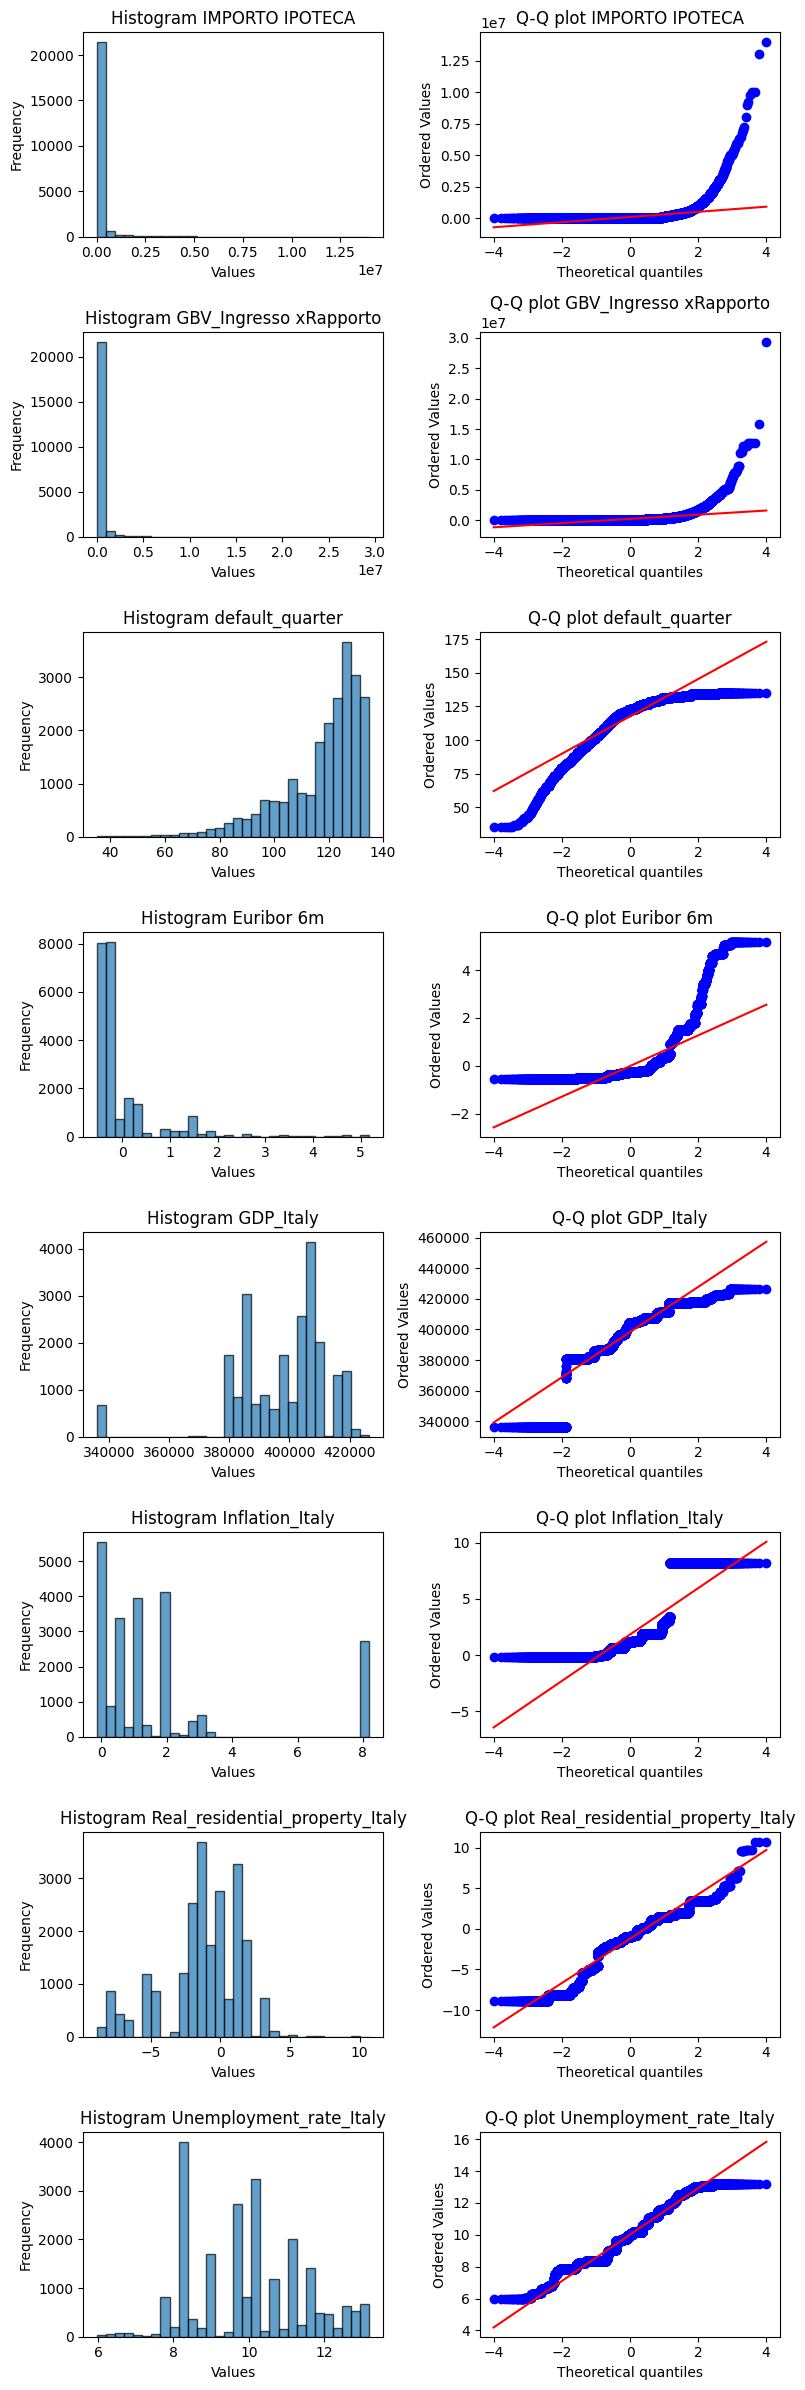

In [ ]:
fig, axs = plt.subplots(len(columns_to_standardize), 2, figsize=(8, len(columns_to_standardize) * 3))
for i, col in enumerate(columns_to_standardize):
    data = df6[col]

    # Histogram
    axs[i, 0].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axs[i, 0].set_title(f'Histogram {col}')
    axs[i, 0].set_xlabel('Values')
    axs[i, 0].set_ylabel('Frequency')

    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Shapiro-Wilk Test
for col in columns_to_standardize:
    data = df6[col]
    shapiro_test = stats.shapiro(data)
    print(f"Shapiro-Wilk Test per {col}: Statistic = {shapiro_test[0]}, p-Value = {shapiro_test[1]}")

Shapiro-Wilk Test per IMPORTO IPOTECA: Statistic = 0.22675782442092896, p-Value = 0.0
Shapiro-Wilk Test per GBV_Ingresso xRapporto: Statistic = 0.29444390535354614, p-Value = 0.0
Shapiro-Wilk Test per default_quarter: Statistic = 0.8591797947883606, p-Value = 0.0
Shapiro-Wilk Test per Euribor 6m: Statistic = 0.6056841611862183, p-Value = 0.0
Shapiro-Wilk Test per GDP_Italy: Statistic = 0.8500516414642334, p-Value = 0.0
Shapiro-Wilk Test per Inflation_Italy: Statistic = 0.6740423440933228, p-Value = 0.0
Shapiro-Wilk Test per Real_residential_property_Italy: Statistic = 0.9373381733894348, p-Value = 0.0
Shapiro-Wilk Test per Unemployment_rate_Italy: Statistic = 0.9703270792961121, p-Value = 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


###**Standardizing numerical columns**

Here below, I create a scaled version of the dataset, scaling all the numerical variables by subtracting the mean and dividing for the standard deviation

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = df6.drop("LGD", axis=1)
X_scaled[columns_to_standardize] = scaler.fit_transform(X_scaled[columns_to_standardize])
X_scaled.head()

,GRADO IPOTECA FORMALE (contrattuale),IMPORTO IPOTECA,TitolareCredito,Codice SAE,Codice RAE,Security_ingresso,GBV_Ingresso xRapporto,default_quarter,Euribor 6m,GDP_Italy,...,DescrizioneRapporto_portafoglio finanziario,DescrizioneRapporto_portafoglio sbf,DescrizioneRapporto_prestiti personali,DescrizioneRapporto_rapporto passato a perdite,DescrizioneRapporto_sopravvenienze,DescrizioneRapporto_sovvenzione bancaria,DescrizioneRapporto_spese,DescrizioneRapporto_spese extracontabili,DescrizioneRapporto_spese extracontabili soff.,DescrizioneRapporto_spese legali
Pratica_Sequential,,,,,,,,,,,,,,,,,,,,,
1,0.138431,0.186109,0.005240,0.259422,0.048799,1,1.210156,-0.306989,-0.307201,0.241793,...,0,0,0,0,0,0,0,0,0,0
1,0.031401,-0.066819,0.005240,0.259422,0.048799,1,1.210156,-0.306989,-0.307201,0.241793,...,0,0,0,0,0,0,0,0,0,0
2,0.817214,-0.229215,0.001551,0.423427,0.432357,0,-0.292565,-0.440584,-0.257680,0.034670,...,0,0,0,0,0,0,0,0,0,0
3,0.138431,1.338747,0.001551,0.423427,0.432357,1,0.553256,0.294190,-0.457345,0.421529,...,0,0,0,0,0,0,0,0,0,0
4,0.138431,1.975732,0.001551,0.423427,0.432357,1,1.068911,-0.039798,-0.314258,0.390871,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
if X_scaled.isnull().values.any():
    print("Sono presenti valori NaN nel dataset.")
else:
    print("Non sono presenti valori NaN nel dataset.")

Non sono presenti valori NaN nel dataset.


#**Feature Selection**

##**Lasso Regression selection**

In [ ]:
y = df6["LGD"]

In [ ]:
lasso = Lasso(alpha=0.0009)
lasso.fit(X_scaled, y)

Lasso(alpha=0.0009)

In [ ]:
Lasso_selection = [feature for feature, coef in zip(df6.columns, lasso.coef_) if coef != 0]

In [ ]:
len(Lasso_selection)

36

In [ ]:
print("Lasso Regression selected the following features:")
print(Lasso_selection)

Lasso Regression selected the following features:
['IMPORTO IPOTECA', 'Codice RAE', 'Security_ingresso', 'GBV_Ingresso xRapporto', 'default_quarter', 'Euribor 6m', 'GDP_Italy', 'Inflation_Italy', 'Real_residential_property_Italy', 'Unemployment_rate_Italy', 'Regione debitore_Calabria', 'Regione debitore_Emilia-Romagna', 'Regione debitore_Lombardia', 'Regione debitore_Puglia', 'Regione debitore_Sardegna', 'Regione debitore_Sicilia', 'Regione debitore_Umbria', 'Provincia debitore_Ancona', 'Provincia debitore_Bergamo', 'Provincia debitore_Brindisi', 'Provincia debitore_Caserta', 'Provincia debitore_Cosenza', 'Provincia debitore_Grosseto', "Provincia debitore_L'Aquila", 'Provincia debitore_Latina', 'Provincia debitore_Lucca', 'Provincia debitore_Mantova', 'Provincia debitore_Pisa', 'Provincia debitore_Salerno', 'Provincia debitore_Vicenza', 'Provincia debitore_Viterbo', 'DescrizioneRapporto_c/c ordinario e assimilati', 'DescrizioneRapporto_conto corrente', 'DescrizioneRapporto_mutuo ipotec

##**Random Forest selection**

In [ ]:
X = df6.drop("LGD", axis=1)

In [ ]:
RF = RandomForestRegressor(n_estimators=100, random_state=100)

In [ ]:
RF.fit(X,y)

RandomForestRegressor(random_state=100)

In [ ]:
selector = SelectFromModel(RF, prefit=True)
X_selected = selector.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
RF_selection = pd.DataFrame(X_selected, columns=[X.columns[i] for i in range(len(X.columns)) if selector.get_support()[i]])

In [ ]:
print(RF_selection.columns)

Index(['IMPORTO IPOTECA', 'TitolareCredito', 'Codice SAE', 'Codice RAE',
       'GBV_Ingresso xRapporto', 'default_quarter', 'Euribor 6m', 'GDP_Italy',
       'Inflation_Italy', 'Real_residential_property_Italy',
       'Unemployment_rate_Italy', 'Regione debitore_Lazio',
       'Regione debitore_Lombardia', 'Regione debitore_Toscana',
       'Provincia debitore_Bergamo', 'Provincia debitore_Milano',
       'DescrizioneRapporto_c/c ordinario e assimilati',
       'DescrizioneRapporto_mutuo chirografario'],
      dtype='object')


##**Pearson Correlation selection**

####**Removing high-correlated features**

Here below, I have a look at the linear correlation among the predictors in order to remove the high-correlated features. As I expected, I don't find any significant linear correlation, since the relationship among the variables is much more complex.

In [ ]:
correlation_matrix = df6.corr()
corr_threshold = 0.7

In [ ]:
highest_corr = (correlation_matrix.abs() > corr_threshold).to_numpy().nonzero()

In [ ]:
features_to_remove = set()

In [ ]:
for i in range(len(highest_corr[0])):
    idx1 = highest_corr[0][i]
    idx2 = highest_corr[1][i]
    if idx1 == idx2:
        continue
    caratteristica1 = correlation_matrix.columns[idx1]
    caratteristica2 = correlation_matrix.columns[idx2]

features_to_remove.add(caratteristica1 if np.abs(correlation_matrix.iloc[idx1, idx2]) == np.abs(correlation_matrix[caratteristica1]).max() else caratteristica2)

In [ ]:
X_linear = df6.drop(columns=features_to_remove)

In [ ]:
print(features_to_remove)

{'DescrizioneRapporto_mutuo ipotecario'}


####**Selecting features correlated with the target variable**

As among predictors, I didn't find any significant linear correlation even between each predictor and the target variable.

In [ ]:
corr = X.apply(lambda x: x.corr(y))
corr_threshold2 = 0.3

In [ ]:
significant_features = corr.index[corr.abs() > corr_threshold2].tolist()

In [ ]:
print(significant_features)

[]


##**Reduced datasets**

###**Intersection features**

Here below, I create two reduced version of the dataset taking into account only the variables selected as significant both by Lasso regression and Random Forest regression. The first version, named data_int, is not scaled, while the second one, named data_int_scaled has the numerical variables scaled.

In [ ]:
RF_set = set(RF_selection.columns)
Lasso_set = set(Lasso_selection)

In [ ]:
Intersection_cols_set = RF_set.intersection(Lasso_set)

In [ ]:
Filtered_cols_int = list(Intersection_cols_set)
print(Filtered_cols_int)

['Inflation_Italy', 'default_quarter', 'Real_residential_property_Italy', 'Provincia debitore_Bergamo', 'Euribor 6m', 'Regione debitore_Lombardia', 'IMPORTO IPOTECA', 'GDP_Italy', 'Codice RAE', 'GBV_Ingresso xRapporto', 'DescrizioneRapporto_c/c ordinario e assimilati', 'Unemployment_rate_Italy']


In [ ]:
data_int = df6[Filtered_cols_int]

In [ ]:
data_int["LGD"] = y

<ipython-input-88-18f6433d47ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_int["LGD"] = y


In [ ]:
data_int

,Inflation_Italy,default_quarter,Real_residential_property_Italy,Provincia debitore_Bergamo,Euribor 6m,Regione debitore_Lombardia,IMPORTO IPOTECA,GDP_Italy,Codice RAE,GBV_Ingresso xRapporto,DescrizioneRapporto_c/c ordinario e assimilati,Unemployment_rate_Italy,LGD
Pratica_Sequential,,,,,,,,,,,,,
1,1.226533,113.0,-2.5917,0,-0.263433,0,178000.0,402148.6,0.048799,976110.14,0,11.562380,0.93
1,1.226533,113.0,-2.5917,0,-0.263433,0,69600.0,402148.6,0.048799,976110.14,0,11.562380,0.93
2,-0.094017,111.0,-2.0140,0,-0.222733,1,0.0,398836.2,0.432357,19756.65,1,11.625165,0.32
3,0.611247,122.0,-0.0892,0,-0.386833,1,672000.0,405023.0,0.432357,558049.31,0,9.769791,0.47
4,1.137488,117.0,-2.2538,0,-0.269233,1,945000.0,404532.7,0.432357,886219.86,0,10.149656,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,8.201290,135.0,-7.2191,1,2.579800,1,1575000.0,419991.0,0.048799,1144177.56,0,7.945948,0.36
23372,8.201290,135.0,-7.2191,1,2.579800,1,700000.0,419991.0,0.048799,1144177.56,0,7.945948,0.36
23373,8.201290,135.0,-7.2191,0,2.579800,0,0.0,419991.0,0.432357,10348.79,1,7.945948,0.69


In [ ]:
data_int_scaled = X_scaled[Filtered_cols_int]
data_int_scaled["LGD"] = y
data_int_scaled

<ipython-input-90-896ff12c59d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_int_scaled["LGD"] = y


,Inflation_Italy,default_quarter,Real_residential_property_Italy,Provincia debitore_Bergamo,Euribor 6m,Regione debitore_Lombardia,IMPORTO IPOTECA,GDP_Italy,Codice RAE,GBV_Ingresso xRapporto,DescrizioneRapporto_c/c ordinario e assimilati,Unemployment_rate_Italy,LGD
Pratica_Sequential,,,,,,,,,,,,,
1,-0.237770,-0.306989,-0.488803,0,-0.307201,0,0.186109,0.241793,0.048799,1.210156,0,1.048767,0.93
1,-0.237770,-0.306989,-0.488803,0,-0.307201,0,-0.066819,0.241793,0.048799,1.210156,0,1.048767,0.93
2,-0.764089,-0.440584,-0.283475,0,-0.257680,1,-0.229215,0.034670,0.432357,-0.292565,1,1.091323,0.32
3,-0.482999,0.294190,0.400644,0,-0.457345,1,1.338747,0.421529,0.432357,0.553256,0,-0.166270,0.47
4,-0.273260,-0.039798,-0.368705,0,-0.314258,1,1.975732,0.390871,0.432357,1.068911,0,0.091206,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,2.542092,1.162560,-2.133489,1,3.152229,1,3.445696,1.357474,0.048799,1.474241,0,-1.402492,0.36
23372,2.542092,1.162560,-2.133489,1,3.152229,1,1.404079,1.357474,0.048799,1.474241,0,-1.402492,0.36
23373,2.542092,1.162560,-2.133489,0,3.152229,0,-0.229215,1.357474,0.432357,-0.307348,1,-1.402492,0.69


###**Union features**

Here below, I create two new version of the dataset taking into account only the variables choosed as significant by Lasso regression and Random Forest regression. As for the intersection dataset, the first version is not scaled, while the second one is scaled.

In [ ]:
Union_cols_set = RF_set.union(Lasso_set)

In [ ]:
Filtered_cols_union = list(Union_cols_set)
print(Filtered_cols_union)

['DescrizioneRapporto_spese', 'Regione debitore_Lombardia', 'Provincia debitore_Mantova', 'GDP_Italy', 'Codice RAE', 'DescrizioneRapporto_c/c ordinario e assimilati', 'Regione debitore_Lazio', 'DescrizioneRapporto_conto corrente', 'Inflation_Italy', 'default_quarter', 'Regione debitore_Puglia', 'Provincia debitore_Bergamo', 'DescrizioneRapporto_mutuo chirografario', 'Security_ingresso', 'Euribor 6m', 'Provincia debitore_Milano', 'Provincia debitore_Caserta', 'Unemployment_rate_Italy', 'Provincia debitore_Vicenza', 'DescrizioneRapporto_prestiti personali', 'Provincia debitore_Salerno', 'TitolareCredito', 'Regione debitore_Sardegna', 'Provincia debitore_Grosseto', 'Provincia debitore_Ancona', 'Provincia debitore_Lucca', 'Provincia debitore_Brindisi', 'Provincia debitore_Viterbo', 'IMPORTO IPOTECA', 'DescrizioneRapporto_mutuo ipotecario', 'Regione debitore_Sicilia', 'GBV_Ingresso xRapporto', 'Provincia debitore_Pisa', 'Regione debitore_Umbria', 'Codice SAE', 'Real_residential_property_Ita

In [ ]:
data_U = df6[Filtered_cols_union]
data_U["LGD"] = y
data_U

<ipython-input-93-804d6f069af9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_U["LGD"] = y


,DescrizioneRapporto_spese,Regione debitore_Lombardia,Provincia debitore_Mantova,GDP_Italy,Codice RAE,DescrizioneRapporto_c/c ordinario e assimilati,Regione debitore_Lazio,DescrizioneRapporto_conto corrente,Inflation_Italy,default_quarter,...,Regione debitore_Umbria,Codice SAE,Real_residential_property_Italy,Regione debitore_Toscana,Regione debitore_Calabria,Provincia debitore_L'Aquila,Provincia debitore_Cosenza,Provincia debitore_Latina,Regione debitore_Emilia-Romagna,LGD
Pratica_Sequential,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,402148.6,0.048799,0,0,0,1.226533,113.0,...,0,0.259422,-2.5917,0,0,0,0,0,0,0.93
1,0,0,0,402148.6,0.048799,0,0,0,1.226533,113.0,...,0,0.259422,-2.5917,0,0,0,0,0,0,0.93
2,0,1,0,398836.2,0.432357,1,0,0,-0.094017,111.0,...,0,0.423427,-2.0140,0,0,0,0,0,0,0.32
3,0,1,0,405023.0,0.432357,0,0,0,0.611247,122.0,...,0,0.423427,-0.0892,0,0,0,0,0,0,0.47
4,0,1,0,404532.7,0.432357,0,0,0,1.137488,117.0,...,0,0.423427,-2.2538,0,0,0,0,0,0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,0,1,0,419991.0,0.048799,0,0,0,8.201290,135.0,...,0,0.000671,-7.2191,0,0,0,0,0,0,0.36
23372,0,1,0,419991.0,0.048799,0,0,0,8.201290,135.0,...,0,0.000671,-7.2191,0,0,0,0,0,0,0.36
23373,0,0,0,419991.0,0.432357,1,0,0,8.201290,135.0,...,0,0.006792,-7.2191,1,0,0,0,0,0,0.69


In [ ]:
data_U_scaled = X_scaled[Filtered_cols_union]
data_U_scaled["LGD"] = y
data_U_scaled

<ipython-input-94-8b80c21b0e46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_U_scaled["LGD"] = y


,DescrizioneRapporto_spese,Regione debitore_Lombardia,Provincia debitore_Mantova,GDP_Italy,Codice RAE,DescrizioneRapporto_c/c ordinario e assimilati,Regione debitore_Lazio,DescrizioneRapporto_conto corrente,Inflation_Italy,default_quarter,...,Regione debitore_Umbria,Codice SAE,Real_residential_property_Italy,Regione debitore_Toscana,Regione debitore_Calabria,Provincia debitore_L'Aquila,Provincia debitore_Cosenza,Provincia debitore_Latina,Regione debitore_Emilia-Romagna,LGD
Pratica_Sequential,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0.241793,0.048799,0,0,0,-0.237770,-0.306989,...,0,0.259422,-0.488803,0,0,0,0,0,0,0.93
1,0,0,0,0.241793,0.048799,0,0,0,-0.237770,-0.306989,...,0,0.259422,-0.488803,0,0,0,0,0,0,0.93
2,0,1,0,0.034670,0.432357,1,0,0,-0.764089,-0.440584,...,0,0.423427,-0.283475,0,0,0,0,0,0,0.32
3,0,1,0,0.421529,0.432357,0,0,0,-0.482999,0.294190,...,0,0.423427,0.400644,0,0,0,0,0,0,0.47
4,0,1,0,0.390871,0.432357,0,0,0,-0.273260,-0.039798,...,0,0.423427,-0.368705,0,0,0,0,0,0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23372,0,1,0,1.357474,0.048799,0,0,0,2.542092,1.162560,...,0,0.000671,-2.133489,0,0,0,0,0,0,0.36
23372,0,1,0,1.357474,0.048799,0,0,0,2.542092,1.162560,...,0,0.000671,-2.133489,0,0,0,0,0,0,0.36
23373,0,0,0,1.357474,0.432357,1,0,0,2.542092,1.162560,...,0,0.006792,-2.133489,1,0,0,0,0,0,0.69


#**Saving datasets**

I save all the versions of the dataset in order to be able to upload them in other jupyter notebooks to analyze them separately.

In [ ]:
df6.to_csv("df6", index=True)
X_scaled.to_csv("X_scaled", index=True)
data_int.to_csv("data_int", index=True)
data_int_scaled.to_csv("data_int_scaled", index=True)
data_U.to_csv("data_U", index=True)
data_U_scaled.to_csv("data_U_scaled", index=True)